In [56]:
import pandas as pd
import json
import numpy as np
from src.generation_utils import SUMMARY_FAILED_GENERATION


def read_logs(path):
    with open(
        path,
        "r"
    ) as f:
        iteration_logs = json.load(f)

    data = []
    edits_by_sum_id = {}
    for iteration in iteration_logs:
        for sum_id, sum_data in iteration["summary"].items():
            if "edit_stats" in sum_data:
                if sum_id not in edits_by_sum_id:
                    edits_by_sum_id[sum_id] = {}
                edits_by_sum_id[sum_id]["token"] = sum_data["edit_stats"]["edit_distance_token"]
                edits_by_sum_id[sum_id]["rouge1"] = sum_data["edit_stats"]["rouge1"]
                edits_by_sum_id[sum_id]["rouge2"] = sum_data["edit_stats"]["rouge2"]
                edits_by_sum_id[sum_id]["rougeL"] = sum_data["edit_stats"]["rougeL"]

        data.append({
            "iteration": iteration["iteration"],
            "summary_factual": iteration["factuality_summary"]["factual"],
            "summary_non_factual": iteration["factuality_summary"]["non_factual"],
            "summary_unknown": iteration["factuality_summary"]["unknown"],
            "summary_failed": iteration["factuality_summary"]["failed"],
            "mean_edit_distance_token": np.mean(
                [x["token"] for x in edits_by_sum_id.values()]
            ),
            "mean_edit_distance_rouge1": np.mean(
                [x["rouge1"] for x in edits_by_sum_id.values()]
            ),
            "mean_edit_distance_rouge2": np.mean(
                [x["rouge2"] for x in edits_by_sum_id.values()]
            ),
            "mean_edit_distance_rougeL": np.mean(
                [x["rougeL"] for x in edits_by_sum_id.values()]
            )
        })
    
    return pd.DataFrame(data).set_index("iteration"), iteration_logs

test_size = 25
num_beams = 8
beam_suffix = "" if num_beams == 4 else f"-beams-{num_beams}"

df_clf, logs_clf = read_logs(
    f"results/iteration-changes/bart-test-extrinsic-{test_size}-classifier-knnv1{beam_suffix}.json"
)
df_oracle, logs_oracle = read_logs(
    f"results/iteration-changes/bart-test-extrinsic-{test_size}-oracle{beam_suffix}.json"
)

df_oracle

/usr/local/anaconda3/envs/factual-beam-search/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/anaconda3/envs/factual-beam-search/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/anaconda3/envs/factual-beam-search/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/anaconda3/envs/factual-beam-search/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,summary_factual,summary_non_factual,summary_unknown,summary_failed,mean_edit_distance_token,mean_edit_distance_rouge1,mean_edit_distance_rouge2,mean_edit_distance_rougeL
iteration,,,,,,,,
0,0.52,0.48,0.0,0,NaN,NaN,NaN,NaN
1,0.60,0.40,0.0,0,7.083333,0.799211,0.676407,0.754105
2,0.68,0.32,0.0,0,4.916667,0.837578,0.737868,0.822074
3,0.68,0.32,0.0,0,5.250000,0.823167,0.717498,0.807663
4,0.68,0.32,0.0,0,5.250000,0.823167,0.717498,0.807663
5,0.68,0.32,0.0,0,5.250000,0.823167,0.717498,0.807663
6,0.68,0.32,0.0,0,5.250000,0.823167,0.717498,0.807663


In [57]:
df_clf

,summary_factual,summary_non_factual,summary_unknown,summary_failed,mean_edit_distance_token,mean_edit_distance_rouge1,mean_edit_distance_rouge2,mean_edit_distance_rougeL
iteration,,,,,,,,
0,0.52,0.48,0.00,0,NaN,NaN,NaN,NaN
1,0.60,0.36,0.04,0,6.583333,0.838758,0.720564,0.810503
2,0.56,0.44,0.00,0,6.666667,0.837499,0.716011,0.798900
3,0.52,0.40,0.08,0,7.083333,0.816905,0.683026,0.775828
4,0.52,0.48,0.00,1,8.083333,0.809150,0.669986,0.753896
5,0.52,0.44,0.04,2,7.250000,0.816706,0.694175,0.776603
6,0.56,0.44,0.00,2,7.083333,0.805731,0.679205,0.782819
7,0.56,0.44,0.00,2,7.333333,0.801389,0.673503,0.778478
8,0.56,0.44,0.00,2,7.333333,0.801389,0.673503,0.778478


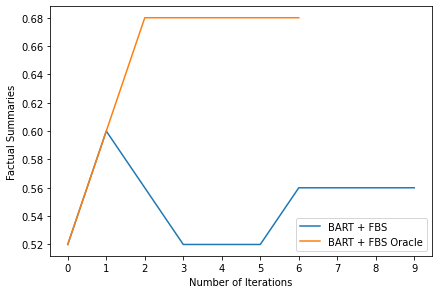

In [59]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

# Be sure to only pick integer tick locations.
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))

ax.plot(
    df_clf.index,
    df_clf.summary_factual,
    label="BART + FBS"
)
ax.plot(
    df_oracle.index,
    df_oracle.summary_factual,
    label="BART + FBS Oracle"
)
ax.margins(0.05)
ax.axis('tight')
fig.tight_layout()
plt.ylabel("Factual Summaries")
plt.xlabel("Number of Iterations")
plt.legend()